In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dtypes_dict = {'created':'str',  'ref_type': 'category', 'device_brand': np.float32, \
                'device_countrycode': 'category', 'device_language': 'category'}

installs = pd.read_csv('data/train_installs.csv.gzip', dtype=dtypes_dict, parse_dates=['created'])
installs.drop('click_hash', axis=1, inplace=True) # Elimino esta columna por tener todos Nan
#installs.drop('trans_id', axis=1, inplace=True) #solo 6 columnas con datos y no son revelantes
installs['created'] = pd.to_datetime(installs['created'], format='%Y-%m-%d %H:%M:%S')

In [216]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id', 'ip_address', 'device_language'],
      dtype='object')

In [21]:
installs['application_id'].value_counts()

7     947
9     731
10    389
16    362
8     328
2     174
29     97
20     95
6      35
1      34
26     28
34     28
15     20
0      18
3      17
28     17
12     15
18     14
24     13
17     13
14     13
21      7
5       3
13      3
33      2
30      2
19      2
32      2
36      1
4       1
23      1
Name: application_id, dtype: int64

In [214]:
installs.head().T

,0,1,2,3,4
created,2019-03-13 01:43:33.445000,2019-03-13 04:58:35.078000,2019-03-13 04:20:57.666000,2019-03-13 04:20:57.698000,2019-03-10 22:24:56.684000
application_id,0,0,0,0,0
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
ref_hash,8464844987297247076,3250564871270161533,7953318831018100268,7953318831018100268,8355110941557237501
attributed,False,False,False,False,False
implicit,False,False,True,False,True
device_countrycode,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
device_brand,3.08306e+17,3.08306e+17,5.13799e+17,5.13799e+17,1.08337e+18
device_model,4.44525e+18,4.44525e+18,6.02654e+18,6.02654e+18,7.87661e+18
session_user_agent,NaN,NaN,HasOffers Mobile AppTracking v1.0,NaN,HasOffers Mobile AppTracking v1.0


In [343]:
installs.loc[installs['kind'] == 'Open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'app_open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'open', 'kind'] = 'EVENT_OPEN_APP'
installs.loc[installs['kind'] == 'EVENT_Homepage', 'kind'] = 'EVENT_HOMEPAGE'
installs['kind'] = installs['kind'].astype('category')
installs['kind'].value_counts()

af_app_opened                 428
EVENT_OPEN_APP                303
EVENT_HOMEPAGE                 76
login_success                  17
account_summary_first_step     13
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
registration                    3
payment method add              3
journey first drop off          2
journey reserved                1
journey drop off                1
install                         1
af_list_view                    1
EVENT_PROMO                     1
Name: kind, dtype: int64

In [3]:
installs.isnull().sum()

created                  0
application_id           0
ref_type                 0
ref_hash                 0
attributed               0
implicit                 0
device_countrycode       0
device_brand          2365
device_model             1
session_user_agent      48
user_agent            1683
event_uuid            2547
kind                  2547
wifi                  1683
trans_id              3406
ip_address               0
device_language         34
dtype: int64

In [37]:
installs.loc[installs['device_model'].isnull()]

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
2157,2019-03-09 16:08:19.919,30,1494519392962156891,4364935818432173881,False,True,6333597102633388268,NaN,NaN,HasOffers Mobile AppTracking v1.0,NaN,78082c4c-0fe1-4fc7-a718-4eba1d943b9c,Open,NaN,NaN,2208800741316080623,NaN


Text(0, 0.5, 'Cantidad de instalaciones')

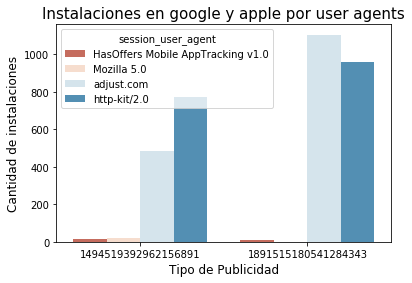

In [433]:
# g5 = sns.countplot(x='ref_type', data=installs, palette='RdBu', hue='session_user_agent')
# g5.set_title("Instalaciones en google y apple por user agents", fontsize =15)
# g5.set_xlabel("Tipo de Publicidad", fontsize = 12)
# g5.set_ylabel("Cantidad de instalaciones", fontsize = 12)
# NO SIRVE

In [80]:
#auctions.loc[auctions['application_id'] == 28].T #"Dalvik", tambien 2, 4, 10,14,16,28
#installs.loc[installs['application_id'] == '15'] # nextgen
#auctions.loc[auctions['application_id'] ==9] #mercadopago
#installs.loc[installs['application_id'] == '21'] #peixelUrbano
#installs.loc[installs['application_id'] ==  '23'] #takealot
#installs.loc[installs['application_id'] == '24'] #hotelurbano

### **1) Instalaciones por pais y sistema operativo usado**

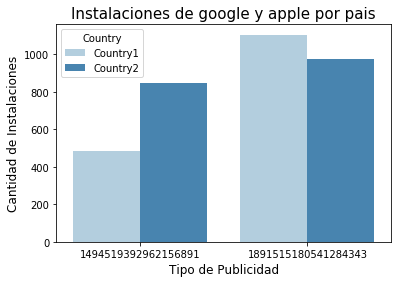

In [304]:
country_device = sns.countplot(x='ref_type', data=installs, palette='Blues', hue='device_countrycode')

country_device.set_title("Instalaciones de google y apple por pais", fontsize =15)
country_device.set_xlabel("Tipo de Publicidad", fontsize = 12)
country_device.set_ylabel("Cantidad de Instalaciones", fontsize = 12)
plt.legend(title='Country', loc='upper left', labels=['Country1', 'Country2'])

### **2) Cantidad de instalaciones por hora y día**

In [6]:
installs['day'] = pd.DatetimeIndex(installs['created']).day;
installs['hour'] = pd.DatetimeIndex(installs['created']).hour;

Text(51.0, 0.5, 'Hora')

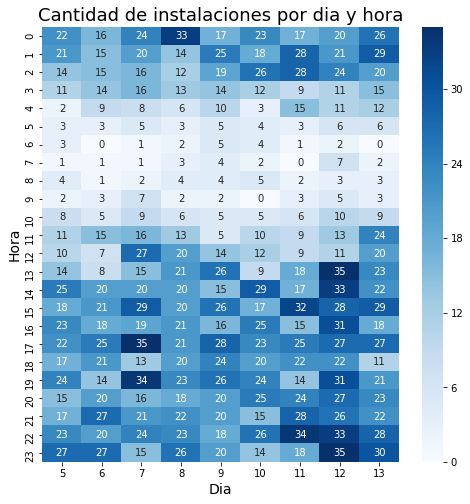

In [6]:
day_hours = installs.groupby(['hour', 'day'])['day'].count().unstack()
day_hours = day_hours.fillna(0)
plt.figure(figsize=(8, 8))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues", annot=True)
heap_map.set_title("Cantidad de instalaciones por dia y hora", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Hora", fontsize=14)

### **3) Tipo de celular al que mas instalaciones se le atribuyen**

Text(0, 0.5, 'Cantidad de Instalaciones')

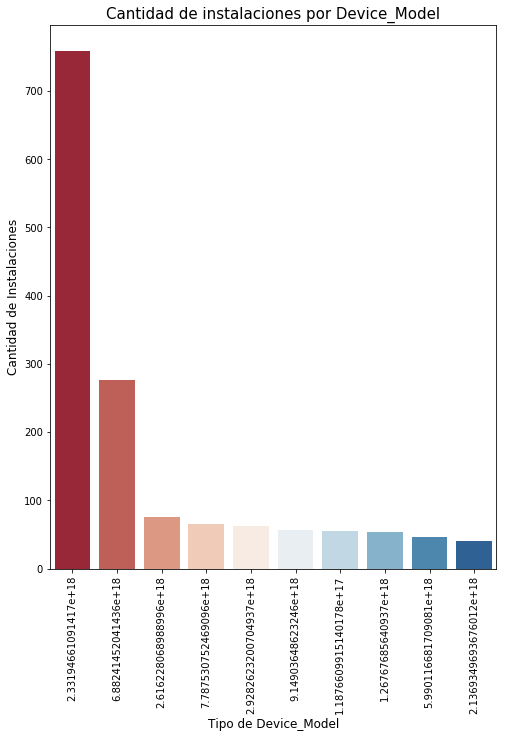

In [22]:
plt.figure(figsize=(8, 10))
device_installs = sns.countplot(x='device_model', data=installs, palette='RdBu',\
                      order=installs['device_model'].value_counts().iloc[:10].index)
device_installs.set_xticklabels(device_installs.get_xticklabels(), rotation=90)
device_installs.set_title("Cantidad de instalaciones por Device_Model", fontsize =15)
device_installs.set_xlabel("Tipo de Device_Model", fontsize = 12)
device_installs.set_ylabel("Cantidad de Instalaciones", fontsize = 12)

### **4) Intalaciones por pais comparadas con el uso de wifi**

Text(0, 0.5, 'Cantidad de Instalaciones')

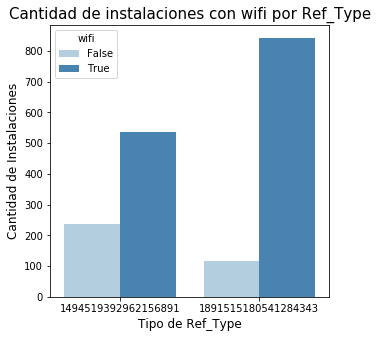

In [24]:
plt.figure(figsize=(5, 5))
wifi_type = sns.countplot(x='ref_type', data=installs, palette='Blues', hue='wifi') 
wifi_type.set_title("Cantidad de instalaciones con wifi por Ref_Type", fontsize =15)
wifi_type.set_xlabel("Tipo de Ref_Type", fontsize = 12)
wifi_type.set_ylabel("Cantidad de Instalaciones", fontsize = 12)

### **5) Diferencia de cantidad de instalaciones con o sin wifi**

In [1]:
# wifi_count = sns.countplot(x='wifi', data=installs, palette='Blues', hue='wifi') 
# wifi_count.set_title("Cantidad de instalaciones con wifi", fontsize =15)
# wifi_count.set_xlabel("Wifi", fontsize = 12)
# wifi_count.set_ylabel("Cantidad de Instalaciones", fontsize = 12)
wifi_count = installs['wifi'].value_counts()
wifi_count.plot.pie(figsize=(6, 6))

NameError: name 'installs' is not defined

### **6) Los 5 eventos más realizados luego de instalar la aplicación**

Text(0.5, 0, 'Tipo de Accion')

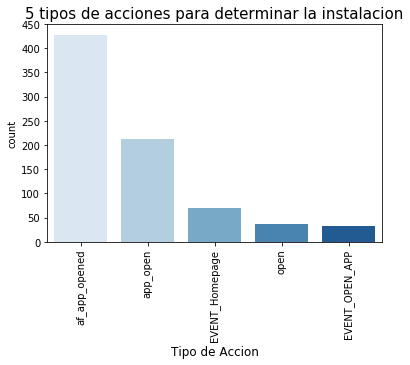

In [28]:
kind_group = sns.countplot(x='kind', data=installs, palette='Blues', order=installs['kind'].value_counts().iloc[:5].index)
kind_group.set_xticklabels(group.get_xticklabels(), rotation=90)
kind_group.set_title("5 tipos de acciones para determinar la instalacion", fontsize =15)
kind_group.set_xlabel("Tipo de Accion", fontsize = 12)

### **7) Las 10 Aplicaciones con mas instalaciones**

Text(0, 0.5, 'Cantidad de Instalaciones')

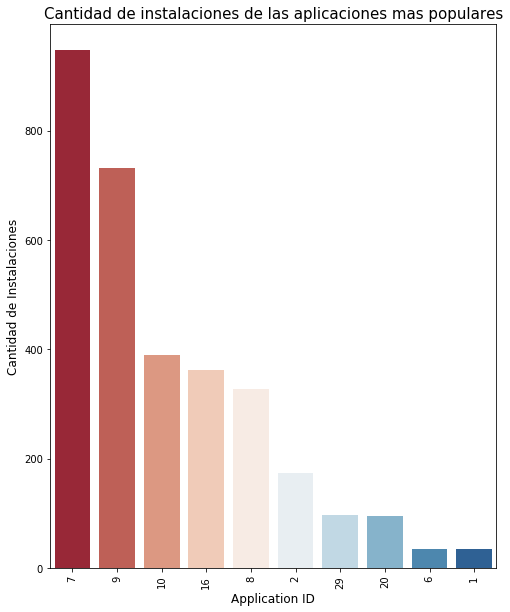

In [32]:
plt.figure(figsize=(8, 10))
app_group = sns.countplot(x='application_id', data=installs, palette='RdBu', order=installs['application_id'].value_counts().iloc[:10].index)
app_group.set_xticklabels(app_group.get_xticklabels(), rotation=90)
app_group.set_title("Cantidad de instalaciones de las aplicaciones mas populares", fontsize =15)
app_group.set_xlabel("Application ID", fontsize = 12)
app_group.set_ylabel("Cantidad de Instalaciones", fontsize = 12)

## **8) Cantidad de Instalaciones de las aplicaciones más populares por día**

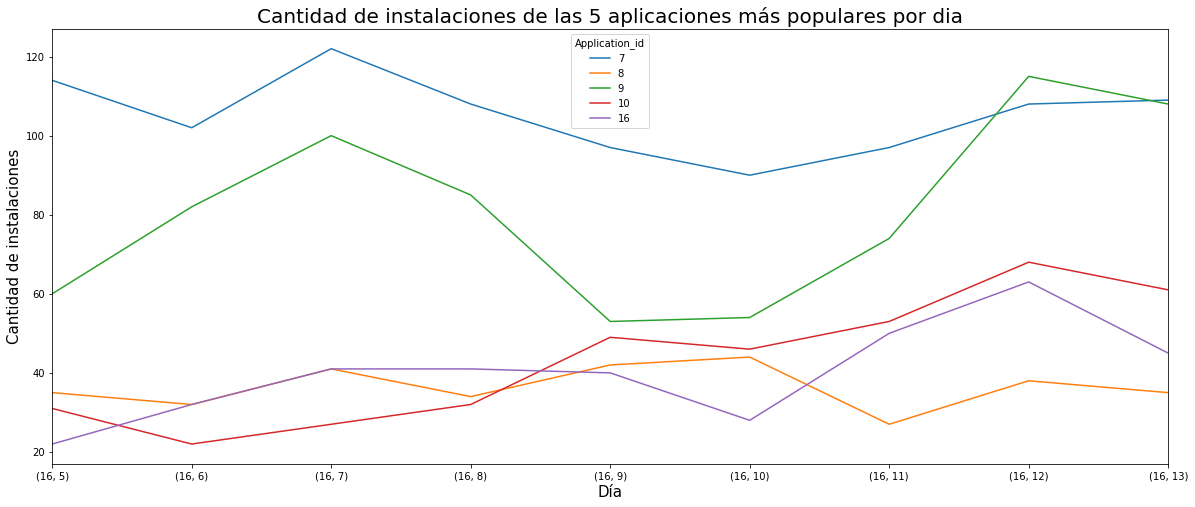

In [39]:
top5_app = [x for x in installs['application_id'].value_counts().head(5).keys()]
top5_group = installs.loc[installs['application_id'].isin(top5_app)]
top_instalation = top5_group.groupby(['application_id', 'day']).size()

fig, ax = plt.subplots()
for key, grp in top_instalation.groupby(['application_id']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, figsize=(20,8))
plt.title("Cantidad de instalaciones de las 5 aplicaciones más populares por dia",size=20)
ax.set_ylabel('Cantidad de instalaciones',size=15);
ax.set_xlabel('Día',size=15);
plt.legend(title='Application_id')
plt.show()

## **9) Cantidad de Instalaciones de las  aplicaciones más populares por hora**

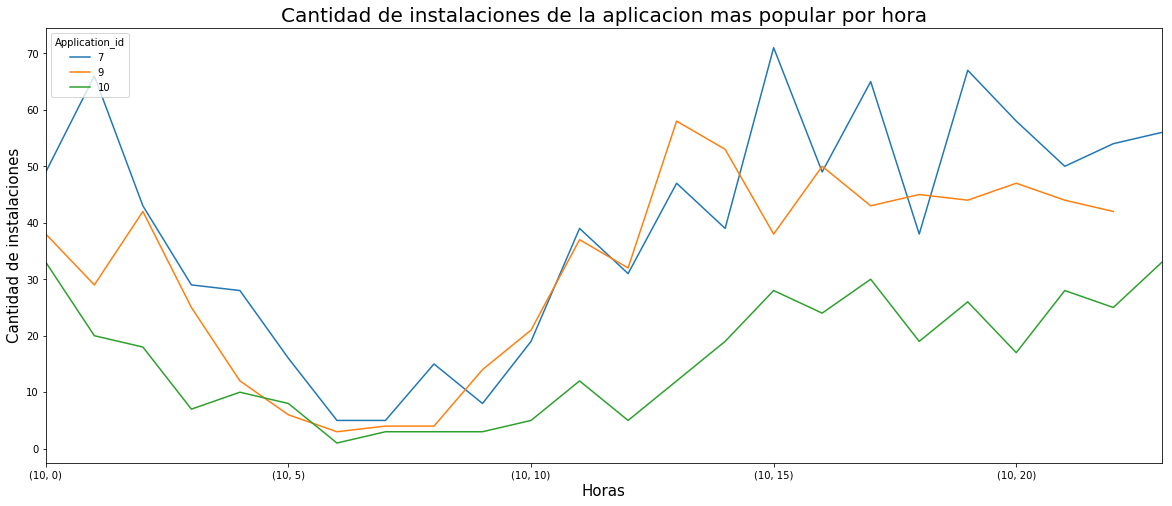

In [9]:
top_app = installs['application_id'].value_counts().head(3).keys()
top_group = installs.loc[installs['application_id'].isin(top_app)]
top_install = top_group.groupby(['application_id', 'hour']).size()

fig, ax = plt.subplots()
for key, grp in top_install.groupby(['application_id']):
    ax = grp.plot(ax=ax, kind='line', x='hour', y='count', label=key, figsize=(20,8))
plt.title("Cantidad de instalaciones de la aplicacion mas popular por hora",size=20)
ax.set_ylabel('Cantidad de instalaciones',size=15);
ax.set_xlabel('Horas',size=15);
plt.legend(title='Application_id', loc='upper left')
plt.show()

## **10) Cantidad de Instalaciones en los dispositivos mas usados por día**

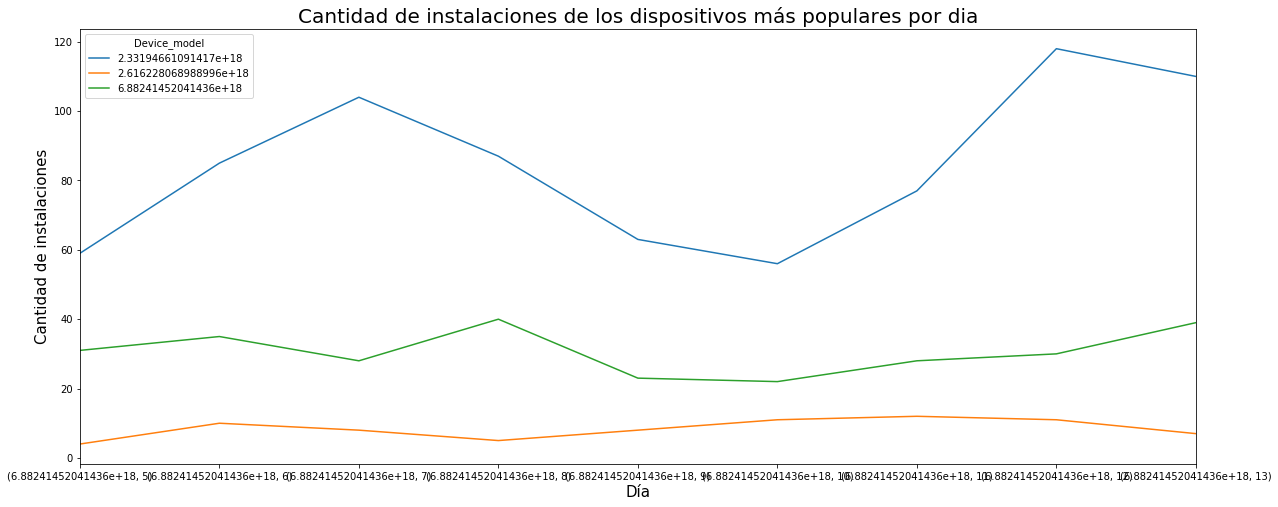

In [5]:
top_device = [x for x in installs['device_model'].value_counts().head(3).keys()]
top_group = installs.loc[installs['device_model'].isin(top_device)]
top_device_install = top_group.groupby(['device_model', 'day']).size() #.to_frame().reset_index()

# top_instalation.columns = ['device_model', 'day', 'count']
# top5_apps = pd.pivot_table(top_instalation, values='count', columns='device_model', \
#                     index='day',aggfunc=np.sum).unstack()

fig, ax = plt.subplots()
for key, grp in top_device_install.groupby(['device_model']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, figsize=(20,8))
plt.title("Cantidad de instalaciones de los dispositivos más populares por dia",size=20)
ax.set_ylabel('Cantidad de instalaciones',size=15);
ax.set_xlabel('Día',size=15);
plt.legend(title='Device_model', loc='upper left')
plt.show()

## **11) Cantidad de Instalaciones del device_brand mas usado por día**

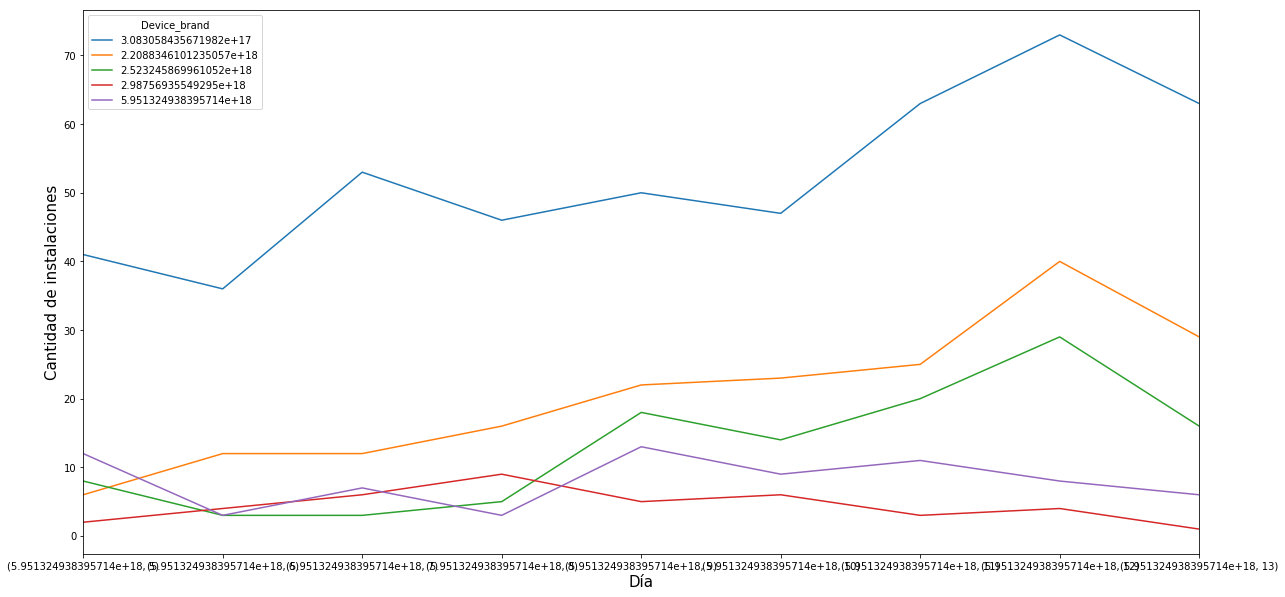

In [10]:
top_device_brand = [x for x in installs['device_brand'].value_counts().head(5).keys()]
top_group = installs.loc[installs['device_brand'].isin(top_device_brand)]
top_device_install = top_group.groupby(['device_brand', 'day']).size() #.to_frame().reset_index()

# top_instalation.columns = ['device_model', 'day', 'count']
# top5_apps = pd.pivot_table(top_instalation, values='count', columns='device_model', \
#                     index='day',aggfunc=np.sum).unstack()

fig, ax = plt.subplots()
for key, grp in top_device_install.groupby(['device_brand']):
    ax = grp.plot(ax=ax, kind='line', x='day', y='count', label=key, figsize=(20,10))
plt.title("",size=20)
ax.set_ylabel('Cantidad de instalaciones',size=15);
ax.set_xlabel('Día',size=15);
plt.legend(title='Device_brand', loc='upper left')
plt.show()

## **12) Cantidad de Instalaciones del device_brand más popular por día**

Text(50.99999999999999, 0.5, 'Device_brand')

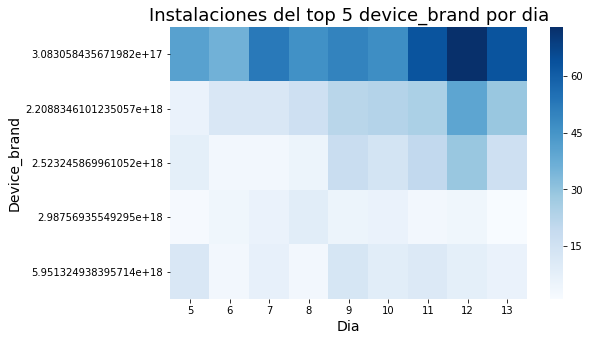

In [7]:
top5_device_brand = [x for x in installs['device_brand'].value_counts().head(5).keys()]
top_group = installs.loc[installs['device_brand'].isin(top5_device_brand)]
brand_day = top_group.groupby([ 'device_brand', 'day'])['day'].count().unstack()

plt.figure(figsize=(8, 5))
heap_map = sns.heatmap(brand_day, cbar=True, cmap="Blues")
heap_map.set_title("Instalaciones del top 5 device_brand por dia", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Device_brand", fontsize=14)

In [12]:
## **13) Cantidad de instalaciones del top 5 aplication_id por dia**

Text(51.0, 0.5, 'Device_brand')

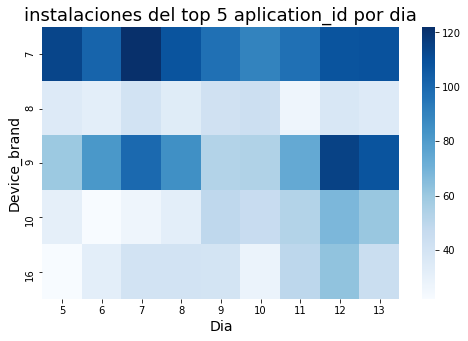

In [11]:
top5_app_id = [x for x in installs['application_id'].value_counts().head(5).keys()]
top_group = installs.loc[installs['application_id'].isin(top5_app_id)]
day_hours = top_group.groupby([ 'application_id', 'day'])['day'].count().unstack()
day_hours
day_hours = day_hours.fillna(0)
plt.figure(figsize=(8, 5))
heap_map = sns.heatmap(day_hours, cbar=True, cmap="Blues")
heap_map.set_title("instalaciones del top 5 aplication_id por dia", fontsize=18)
heap_map.set_xlabel("Dia", fontsize=14)
heap_map.set_ylabel("Device_brand", fontsize=14)

In [75]:
top_app = [x for x in installs['application_id'].value_counts().head(5).keys()]
top_device = [x for x in installs['ref_hash'].value_counts().head(5).keys()]
top_group = installs.loc[installs['application_id'].isin(top_app) & installs['ref_hash'].isin(top_device)]
# day_hours = top_group.groupby([ 'application_id', 'day'])['day'].count().unstack()
df = top_group[['application_id', 'ref_hash']]
# df.count()
# heap_map = sns.heatmap(df, cbar=True, cmap="Blues")

application_id    10
ref_hash          10
dtype: int64

application_id        2    8    10   16   29
ref_hash                                    
470581161921490835   NaN  3.0  NaN  NaN  NaN
1999001885916451618  NaN  NaN  NaN  NaN  3.0
3272750442824629569  2.0  NaN  NaN  2.0  NaN
5208834946313176321  2.0  NaN  2.0  NaN  NaN
8209340170282049305  NaN  NaN  3.0  NaN  NaN


Text(50.99999999999999, 0.5, '')

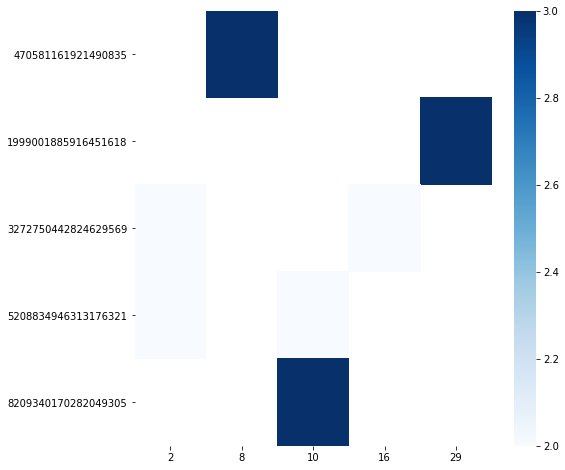